#  Import Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, 
                                    Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


C:\Users\abhij\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Load and Preprocess the Data

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data to the range [0, 1] for faster convergence
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Define the CNN Model

In [3]:
model = Sequential()

# First convolutional layer with 32 filters, kernel size of (3,3), and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))  # First max-pooling layer with pool size of (2,2)

# Second convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))  # Second max-pooling layer

# Third convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from convolutional layers
model.add(Flatten())

# Adding a fully connected layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer with 10 neurons (one for each class) and softmax activation for probability distribution
model.add(Dense(10, activation='softmax'))


C:\Users\abhij\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the Model

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the Model

In [5]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test), batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 68ms/step - accuracy: 0.2731 - loss: 1.9262 - val_accuracy: 0.4904 - val_loss: 1.4024
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.4834 - loss: 1.4484 - val_accuracy: 0.5683 - val_loss: 1.2065
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.5422 - loss: 1.2880 - val_accuracy: 0.6047 - val_loss: 1.1096
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.5825 - loss: 1.1899 - val_accuracy: 0.6358 - val_loss: 1.0208
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.6074 - loss: 1.1195 - val_accuracy: 0.6533 - val_loss: 0.9794
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.6395 - loss: 1.0358 - val_accuracy: 0.6529 - val_loss: 0.9701
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.6543 - loss: 0.9948 - val_accuracy: 0.6799 - val_loss: 0.9111
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.6741 - loss: 0.9369 - 

# Evaluate the Model

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7173 - loss: 0.8261
Test Accuracy: 0.7113999724388123


#  Plot Accuracy and Loss Over Epochs

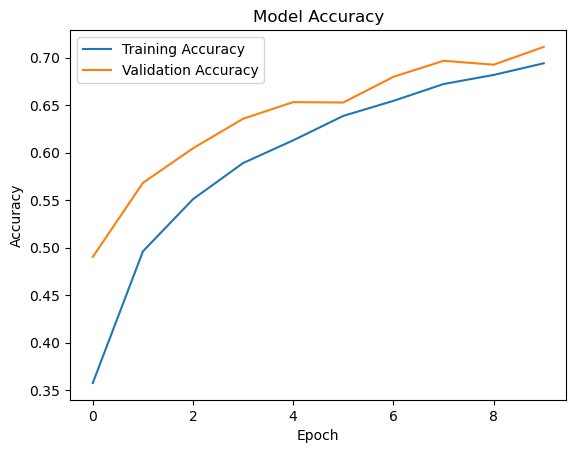

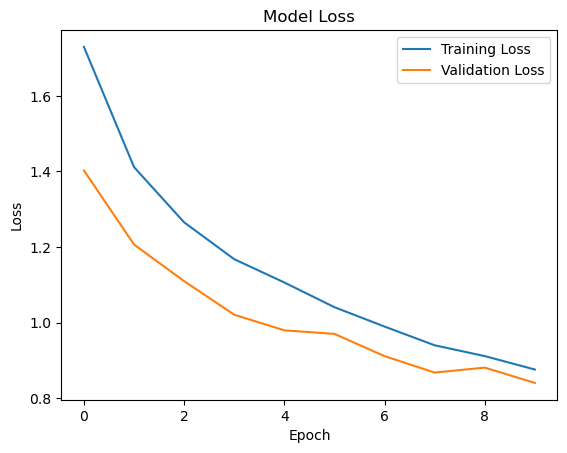

In [7]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
